In [116]:
#João Farias, nmec. 124964
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import math
g=9.81
P=250
cres= 0.8
u=0.005
par=1.225
m=75
A=0.3

In [117]:
N=10000
tfinal=300
xt= np.zeros(N)
vxt= np.zeros(N)
frar = np.zeros(N)
t= np.zeros(N)
xt[0]=0
vxt[0]=2
t[0]=0
frar[0]=0
dt=tfinal/N
goalindex=0
goaltime=0

In [118]:
def euler():
    for i in range(N-1):
        fx = P/vxt[i] - u*m*g - 0.5*cres*A*par*(vxt[i]**2)
        frar[i+1] = 0.5*cres*A*par*(vxt[i]**2)
        ax=fx/m
        xt[i+1]=xt[i]+vxt[i]*dt
        
        vxt[i+1]=vxt[i]+ax*dt
        
        t[i+1]=t[i]+dt


        if(xt[i+1]>3000 and xt[i]<3000):
            goalindex=round((2*i+1)/2)
            goaltime= goalindex*dt
    return goalindex, goaltime
goalindex, goaltime = euler()

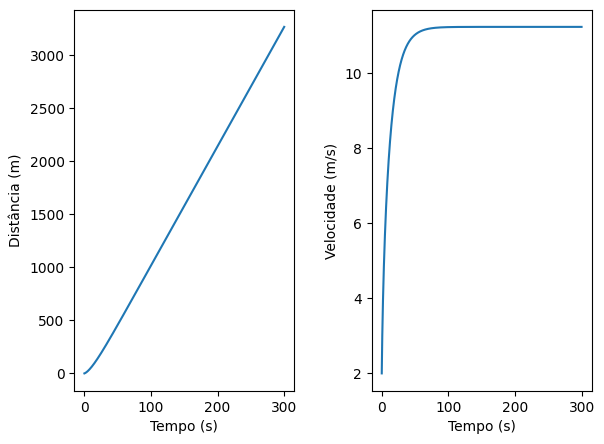

In [119]:
figure, axis= plt.subplots(1,2)
axis[0].plot(t,xt, linestyle="-")
axis[1].plot(t,vxt, linestyle="-")
axis[0].set_xlabel("Tempo (s)")
axis[0].set_ylabel("Distância (m)")
axis[1].set_xlabel("Tempo (s)")
axis[1].set_ylabel("Velocidade (m/s)")
figure.tight_layout(pad=2.0)

In [120]:
print("A velocidade terminal do ciclista é: " + str(float(vxt[-1])) + " m/s")
print("O ciclista atinge os 3 km aos: " + str(goaltime) + " s")

A velocidade terminal do ciclista é: 11.238413087716394 m/s
O ciclista atinge os 3 km aos: 276.53999999999996 s


In [121]:
dx = xt[-1]/N
def trap_integral():
    return dx * ((frar[0]+frar[goalindex-1])*0.5+np.sum(frar[1:goalindex-1]))
Wfrar = trap_integral()
print("A força de resistência do ar realiza um trabalho de: " + str(float(Wfrar)) + "J")

A força de resistência do ar realiza um trabalho de: 52670.7942224594J
